/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 1.0
[[ 9  0]
 [ 0 11]]


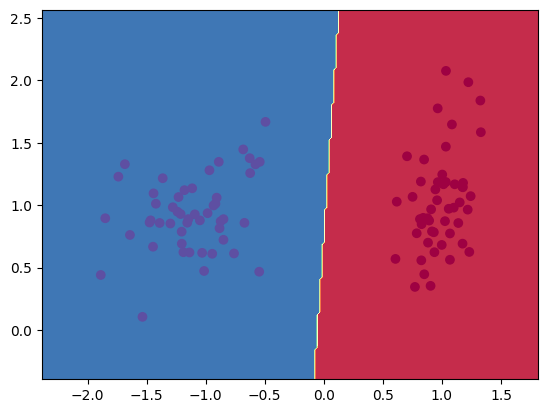

In [27]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Generate a random dataset
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                            random_state=1, n_clusters_per_class=1)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Define the neural network model
model = MLPClassifier(hidden_layer_sizes=(5, 2), activation='logistic', solver='adam', max_iter=1000)

# Train the model on the training set
model.fit(X_train, y_train)

# Evaluate the model on the testing set
score = model.score(X_test, y_test)
print(f"Accuracy: {score}")
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))

# Plot the decision boundary
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
plt.show()
